In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing data set

In [2]:
df=pd.read_csv('medical_cost_insurance.csv')

In [4]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# EDA EXPLORATARY DATA ANALYSIS

In [4]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
#checking null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No Null values are present.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


1)Dataset datatypes are correct..
2)Dataset have both categorical and numerical columns.
3)Dataset contains 6 features and 1 target variables.

In [7]:
#seperating the numerical and categorical columns

#checking the Categorical columns
Categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i] =="object": 
        Categorical_col.append(i)
 
print("Categorical columns:  ",Categorical_col)
print("\n")


Numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i] !="object": 
        Numerical_col.append(i)
 
print("Numerical columns:  ",Numerical_col)
print("\n")


Categorical columns:   ['sex', 'smoker', 'region']


Numerical columns:   ['age', 'bmi', 'children', 'charges']




In [8]:
#checking the list of counts of target
df.nunique().to_frame("no of unique values")

,no of unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [9]:
#checking the value counts of each column 
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


male      676
female    662
Name: sex, dtype: int64


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455 

In [11]:
#Statastical measures of dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The statistical information of numerical columns..The summary of dataset looks perfect since no negative / invalid values are present.
1)Thereis no huge difference between mean and median looks like data is not skweed.

# DATA VISULIZATION

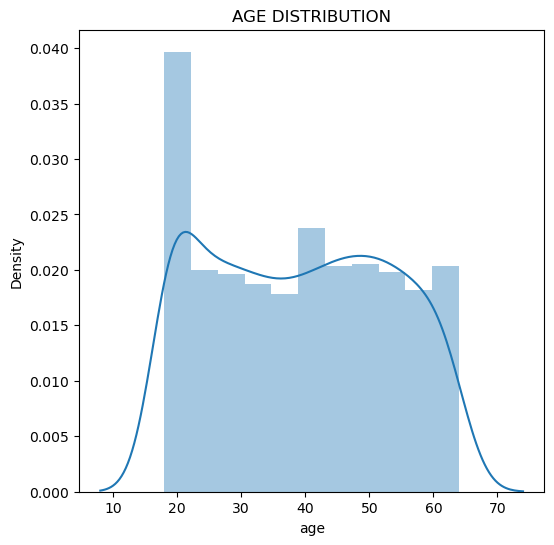

In [10]:
#Distribution of age column
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title("AGE DISTRIBUTION")
plt.show()

1)the distribution shows normal and more people lies between 18-25 age.

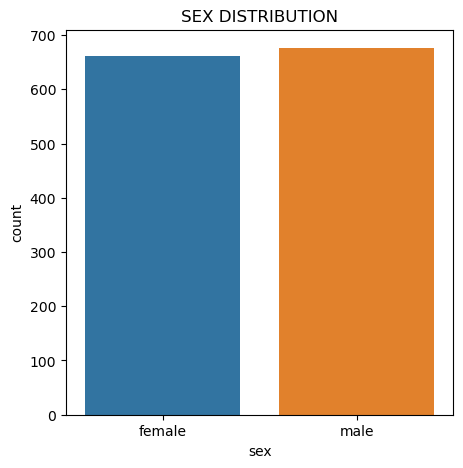

male      676
female    662
Name: sex, dtype: int64

In [11]:
#checkin the distribution of sex by countplot
plt.figure(figsize=(5,5))
sns.countplot(data=df, x='sex')
plt.title("SEX DISTRIBUTION")
plt.show()
df['sex'].value_counts()

There is no huge didfference in sex columns column is balanced in both male and female

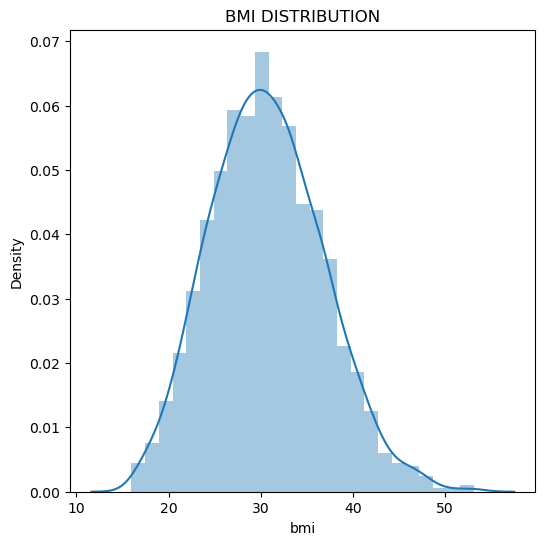

In [12]:
#BMI distribution 
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title("BMI DISTRIBUTION")
plt.show()

1)BMI is normally distributed and most of them lies in  30.
2)Normal BMI Range -- 18.5 to 24.9..but in this dataset more number of values in 25 to 30 means lot of people are  overweight it effect the insurance cost..

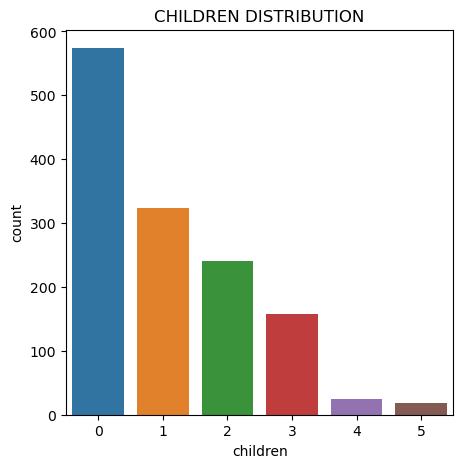

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [13]:
#checkin the distribution of sex by countplot
plt.figure(figsize=(5,5))
sns.countplot(data=df, x='children')
plt.title("CHILDREN DISTRIBUTION")
plt.show()
df['children'].value_counts()

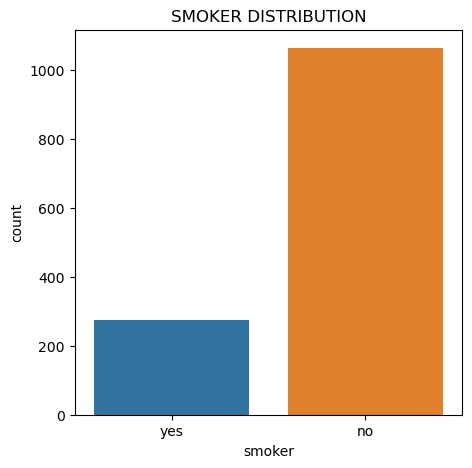

no     1064
yes     274
Name: smoker, dtype: int64

In [14]:
#checkin the distribution of sex by countplot
plt.figure(figsize=(5,5))
sns.countplot(data=df, x='smoker')
plt.title("SMOKER DISTRIBUTION")
plt.show()
df['smoker'].value_counts()

Smoker column is imbalanced seems huge differences in smoker yes and no

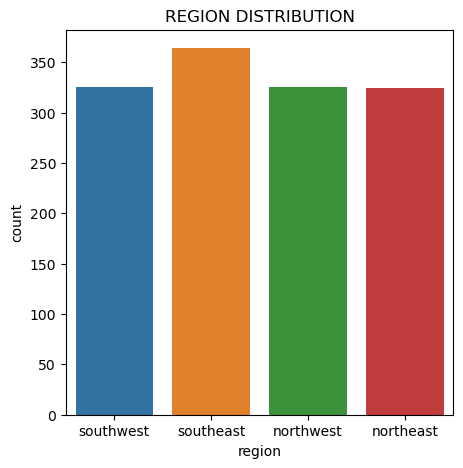

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [15]:
#checkin the distribution of sex by countplot
plt.figure(figsize=(5,5))
sns.countplot(data=df, x='region')
plt.title("REGION DISTRIBUTION")
plt.show()
df['region'].value_counts()

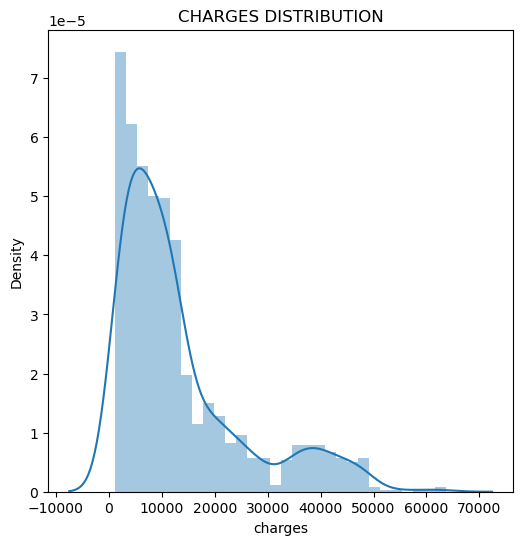

In [16]:
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title("CHARGES DISTRIBUTION")
plt.show()

The data in charges lies more in 0 to 10000

ENCODING CATEGORICAL COLUMNS

In [17]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]= OE.fit_transform(df[i].values.reshape(-1,1))
df   

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


In [18]:
#stattical numerical values
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [19]:
df.dtypes

age           int64
sex         float64
bmi         float64
children      int64
smoker      float64
region      float64
charges     float64
dtype: object

All categorical values are converted into Numerical values

In [20]:
#check the correlation
cor = df.corr()
cor

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


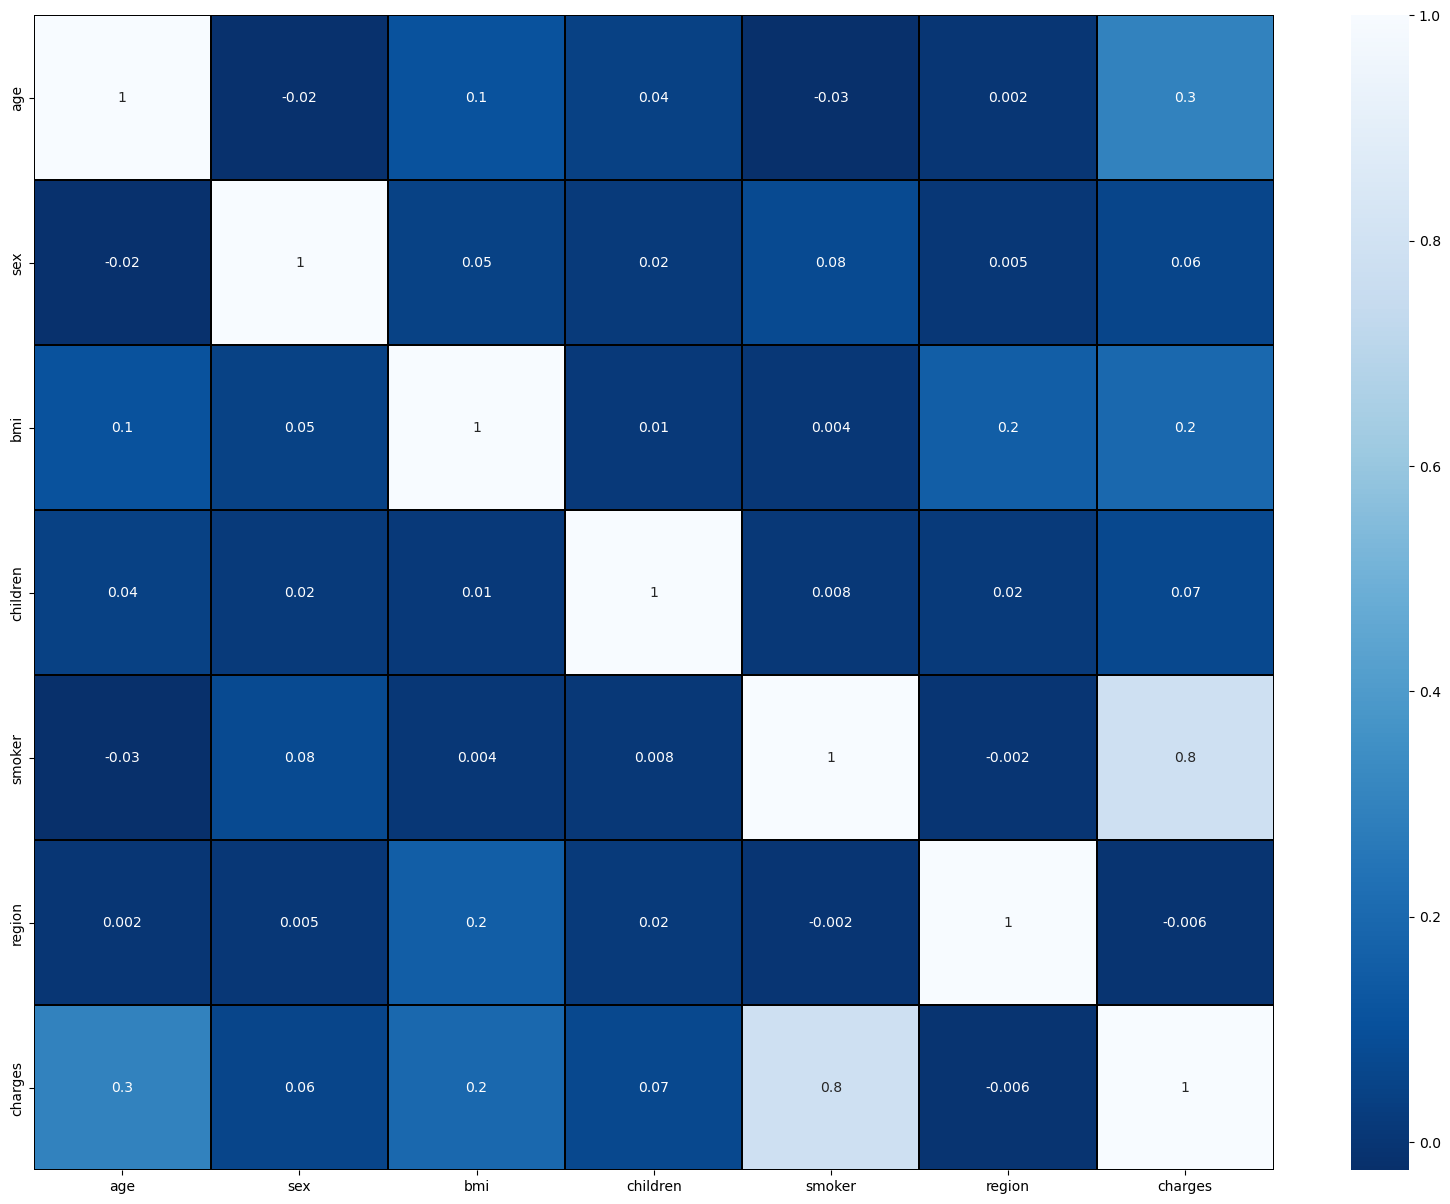

In [21]:
#by using heatmap checking the correlation matrix
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), linewidths=0.1,fmt='.1g', linecolor="black", annot=True, cmap="Blues_r")
plt.show()

1)There is some correlation between smoker and charges..but we are going to drop any column we going to lost data.

# sepertaing features and labels

In [22]:
x=df.drop("charges", axis=1)
y=df["charges"]

In [23]:
print(x)
print(y)

      age  sex     bmi  children  smoker  region
0      19  0.0  27.900         0     1.0     3.0
1      18  1.0  33.770         1     0.0     2.0
2      28  1.0  33.000         3     0.0     2.0
3      33  1.0  22.705         0     0.0     1.0
4      32  1.0  28.880         0     0.0     1.0
...   ...  ...     ...       ...     ...     ...
1333   50  1.0  30.970         3     0.0     1.0
1334   18  0.0  31.920         0     0.0     0.0
1335   18  0.0  36.850         0     0.0     2.0
1336   21  0.0  25.800         0     0.0     3.0
1337   61  0.0  29.070         0     1.0     1.0

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


# feature scaling using standardscaler

In [25]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)# after the scaling the output in arrarys so keep in dataframe
x

,age,sex,bmi,children,smoker,region
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,1.343905
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,0.438495
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,0.438495
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,-0.466915
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,-0.466915
...,...,...,...,...,...,...
1333,0.768473,0.989591,0.050297,1.580926,-0.507463,-0.466915
1334,-1.509965,-1.010519,0.206139,-0.908614,-0.507463,-1.372326
1335,-1.509965,-1.010519,1.014878,-0.908614,-0.507463,0.438495
1336,-1.296362,-1.010519,-0.797813,-0.908614,-0.507463,1.343905


# DATA MODELLING

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Creating train test split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=100)

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge

In [29]:
models=[LinearRegression(),DecisionTreeRegressor(),KNN(),RandomForestRegressor(),
        Lasso(),Ridge()]

In [30]:
def r2score_train_test():
    
    for model in models:
        model.fit(x_train,y_train)
        y_train_pred = model.predict(x_train)
        y_test_pred =model.predict(x_test)
        
        
        print('r2 Score for the training', model, '=', r2_score(y_train,y_train_pred)*100)
        print('r2 Score for the testing', model, '=',  r2_score(y_test,y_test_pred)*100)
        print('Mean Absolute Error:', model, '=',  mean_absolute_error(y_test,y_test_pred))
        print('Mean squared Error:', model, '=',  mean_squared_error(y_test,y_test_pred))
        print('Root Mean square Error:', model, '=',   np.sqrt(mean_squared_error(y_test,y_test_pred)))
        print('-'*30)       
        print("\n")
              

In [68]:
r2score_train_test()

r2 Score for the training LinearRegression() = 73.99787783044458
r2 Score for the testing LinearRegression() = 78.07502495003385
Mean Absolute Error: LinearRegression() = 3937.908719788141
Mean squared Error: LinearRegression() = 32280848.351876814
Root Mean square Error: LinearRegression() = 5681.623742547267
------------------------------


r2 Score for the training DecisionTreeRegressor() = 99.87502996031803
r2 Score for the testing DecisionTreeRegressor() = 70.46156880076708
Mean Absolute Error: DecisionTreeRegressor() = 3176.882766728358
Mean squared Error: DecisionTreeRegressor() = 43490385.54989175
Root Mean square Error: DecisionTreeRegressor() = 6594.724069276269
------------------------------


r2 Score for the training KNeighborsRegressor() = 86.87920377309054
r2 Score for the testing KNeighborsRegressor() = 83.57742247273178
Mean Absolute Error: KNeighborsRegressor() = 3153.9943243552234
Mean squared Error: KNeighborsRegressor() = 24179490.900059372
Root Mean square Error: 

In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
def compare_models_cross_validation():
    
    for model in models:
        
        cv_score = cross_val_score(model, x, y, cv=5)
        r2_accuracy = sum(cv_score)/len(cv_score)
        r2_accuracy = r2_accuracy*100
        
        
        print('Cross Validation Score for the', model, '=', cv_score)
        print('r2 Accuracy  of the', model, '=', r2_accuracy,'%')
        print('-'*30) 
        print("\n") 

In [33]:
compare_models_cross_validation()

Cross Validation Score for the LinearRegression() = [0.76123983 0.70838663 0.77786772 0.73365206 0.7551335 ]
r2 Accuracy  of the LinearRegression() = 74.72559473580954 %
------------------------------


Cross Validation Score for the DecisionTreeRegressor() = [0.77534057 0.68993955 0.7232003  0.71554228 0.66538275]
r2 Accuracy  of the DecisionTreeRegressor() = 71.3881093586312 %
------------------------------


Cross Validation Score for the KNeighborsRegressor() = [0.8221881  0.75561595 0.83987794 0.8050002  0.80856984]
r2 Accuracy  of the KNeighborsRegressor() = 80.62504043685739 %
------------------------------


Cross Validation Score for the RandomForestRegressor() = [0.85741496 0.77372244 0.8706178  0.82919217 0.85585842]
r2 Accuracy  of the RandomForestRegressor() = 83.73611594682382 %
------------------------------


Cross Validation Score for the Lasso() = [0.76124697 0.70842054 0.77784891 0.73364937 0.75513888]
r2 Accuracy  of the Lasso() = 74.72609349374298 %
---------------

# Model selection

In [57]:
#difference between models and cross validation score
print("Diff between r2_score and cross_validation score  for LinearRegression is =",  78.07 -74.72)
print("Diff between r2_score and cross_validation score  for DecisionTreeRegressor is =",   70.46 -71.38)
print("Diff between r2_score and cross_validation score  for KNeighborsRegressor is =",  83.57 -80.62)
print("Diff between r2_score and cross_validation score  for RandomForestRegressor is =",  85.44 -83.56)
print("Diff between r2_score and cross_validation score  for Lasso is =",  78.07-74.72)
print("Diff between r2_score and cross_validation score  for Ridge is =", 78.07 -74.72)

Diff between r2_score and cross_validation score  for LinearRegression is = 3.3499999999999943
Diff between r2_score and cross_validation score  for DecisionTreeRegressor is = -0.9200000000000017
Diff between r2_score and cross_validation score  for KNeighborsRegressor is = 2.9499999999999886
Diff between r2_score and cross_validation score  for RandomForestRegressor is = 1.8799999999999955
Diff between r2_score and cross_validation score  for Lasso is = 3.3499999999999943
Diff between r2_score and cross_validation score  for Ridge is = 3.3499999999999943


from the above  DecisionTreeRegressor and RandomForestRegressor are the best models.But we are select RandomForestRegressor because training and testing score have less difference when compared to decisiontreeregressor

RANDOMFORESTREGRESSOR IS THE BEST MODEL

# HYPER PARAMETER TUNING

In [64]:
from sklearn.model_selection import RandomizedSearchCV

parameters ={
             'bootstrap': [True,False],
              'n_estimators' :[5,10,15],
             'max_depth' : [2,8,15],
              'min_samples_split':[2,4],
              'min_samples_leaf':[1,2],
               'min_weight_fraction_leaf':[0.0,0.1],
               'max_leaf_nodes':[None],
             'min_impurity_decrease':[0.0,0.1],'ccp_alpha':[0.0,0.1],
             'verbose':[0],'random_state':[None],
             'max_features' : [0.1,0.4],
             'max_samples' : [None],
             }

In [65]:
RCV=RandomizedSearchCV(RandomForestRegressor(),parameters,cv=5,verbose=2)

In [66]:
RCV.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=0.1, max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.1, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=5, random_state=None, verbose=0; total time=   0.0s
[CV] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=0.1, max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.1, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=5, random_state=None, verbose=0; total time=   0.0s
[CV] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=0.1, max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.1, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=5, random_state=None, verbose=0; total time=   0.0s
[CV] END bootstrap=True, ccp_alpha=0.1, max_depth=8, max_features=0.1, max_leaf_nodes=None, max_samples=None, min_impuri

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'ccp_alpha': [0.0, 0.1],
                                        'max_depth': [2, 8, 15],
                                        'max_features': [0.1, 0.4],
                                        'max_leaf_nodes': [None],
                                        'max_samples': [None],
                                        'min_impurity_decrease': [0.0, 0.1],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 4],
                                        'min_weight_fraction_leaf': [0.0, 0.1],
                                        'n_estimators': [5, 10, 15],
                                        'random_state': [None],
                                        'verbose': [0]},
                   verbose=2)

In [68]:
RCV.best_params_

{'verbose': 0,
 'random_state': None,
 'n_estimators': 15,
 'min_weight_fraction_leaf': 0.0,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'min_impurity_decrease': 0.0,
 'max_samples': None,
 'max_leaf_nodes': None,
 'max_features': 0.4,
 'max_depth': 8,
 'ccp_alpha': 0.1,
 'bootstrap': False}

In [72]:
best_model = RandomForestRegressor(verbose= 0,
 random_state= None,
 n_estimators= 15,
 min_weight_fraction_leaf= 0.0,
 min_samples_split= 2,
 min_samples_leaf= 2,
 min_impurity_decrease= 0.0,
 max_samples= None,
 max_leaf_nodes= None,
 max_features= 0.4,
 max_depth= 8,
 ccp_alpha= 0.1,
 bootstrap= False)
best_model.fit(x_train,y_train)
y_train_pred = best_model.predict(x_train)
y_test_pred =best_model.predict(x_test)
print(r2_score(y_test,y_test_pred)*100)

87.76468815269484


BY PERFORMING HYPERPARAMETER TUNING USING RANDOMIZEDSEARCHCV there is a increase in R2_SCORE from 85.44 to 87.76. 

In [73]:
#saving model using .pkl
import joblib
joblib.dump(best_model ,"medical_insurance.pkl")

['medical_insurance.pkl']